In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [24]:
df = pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')

In [25]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [27]:
df.drop(columns = 'Serial No.', inplace = True)

In [28]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [29]:
df.isnull().sum().sum()

0

In [30]:
df.duplicated().sum()

0

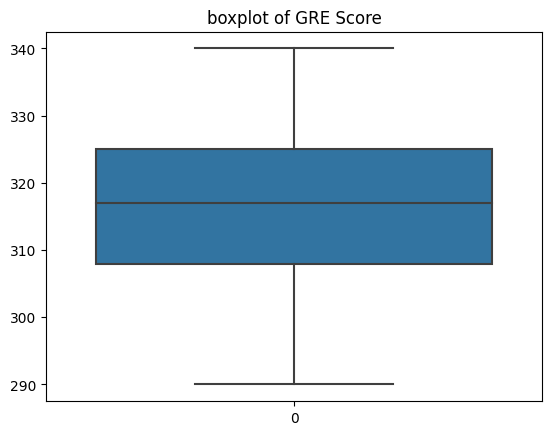

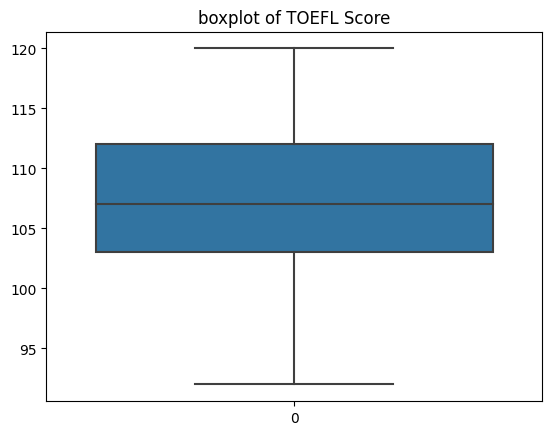

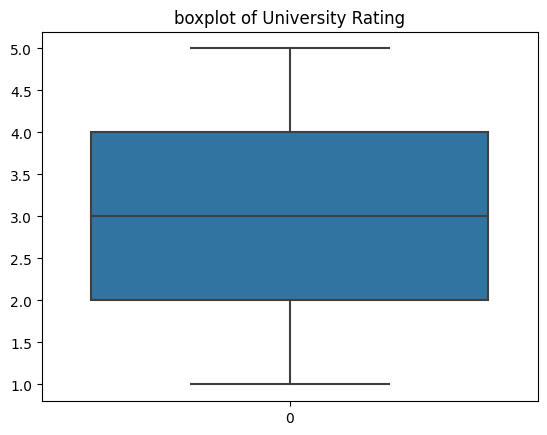

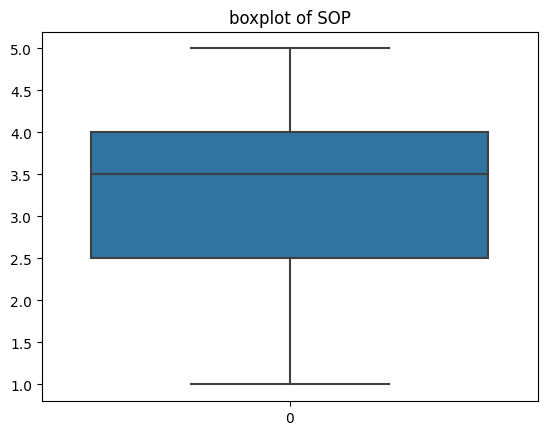

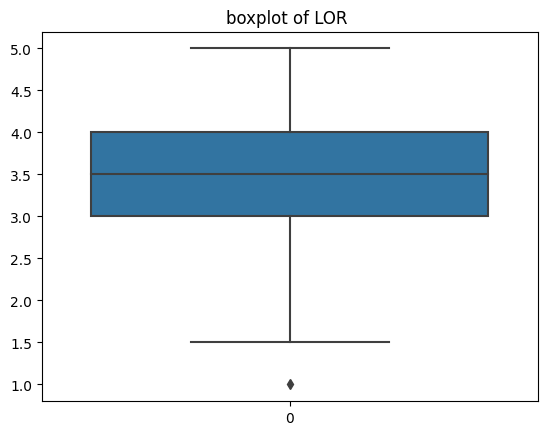

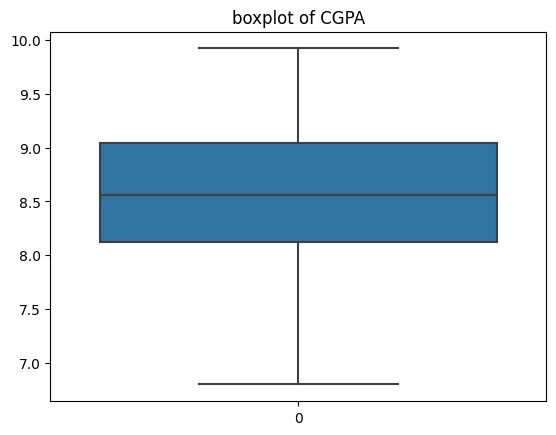

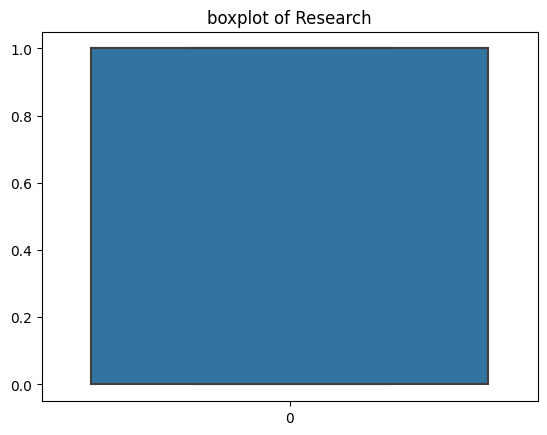

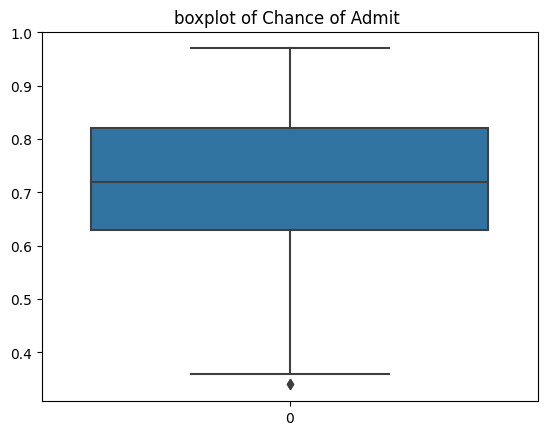

In [31]:
for col in df.columns:
    if df[col].dtype != 'object':
        sns.boxplot(df[col])
        plt.title(f'boxplot of {col}')
        plt.show()

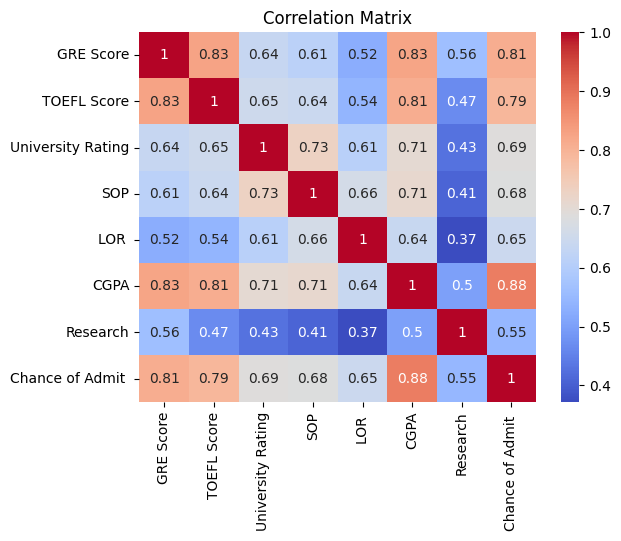

In [41]:
corrMat = df.corr()
sns.heatmap(data = corrMat, annot = True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [43]:
 #train_test split library
from sklearn.model_selection import train_test_split

In [40]:
X = df.drop(columns = 'Chance of Admit ')
y = df['Chance of Admit ']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [54]:
# Model Training

class LinearRegressionManual():
    def __init__(self):
       self.theta = None

    def fit(self, X,Y):
        ones = np.ones((X.shape[0], 1)) #we are creating ones vector/matrix of X's row's shape for bias
        X_b = np.hstack((ones, X))
        self.theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ Y

    def predict(self, X):
        ones = np.ones((X.shape[0], 1))
        X_b = np.hstack((ones, X))
        return X_b @ self.theta

    def print_weights(self):
        print("Bias (intercept):", self.theta[0][0])
        print("Weights:", self.theta[1:].flatten())

In [58]:
model = LinearRegressionManual()
model.fit(X_train, y_train)

In [61]:
y_pred = model.predict(X_test)

In [65]:
from sklearn.metrics import r2_score

r2_score(y_pred, y_test)

0.7966340076896696